In [13]:
from experiments.datasets import DATASETS

dataset = [dataset for dataset in DATASETS if dataset.name == "atmosphere_data"][0]

In [14]:
import numpy as np

# Solution generated using get_ga_solutions function in R/distribution_optimization.R
ga_solution = np.array(
    [
        0.9640658,
        0.4646507,
        0.1024163,
        0.8321238,
        0.6839347,
        0.1776506,
        0.2455798,
        0.1078338,
        0.2870086,
        0.3045512,
        -2.06734,
        -0.7167394,
        0.1129442,
        0.9859371,
        2.186177,
    ]
)

ga_solution[: dataset.nr_of_modes] = ga_solution[: dataset.nr_of_modes] / np.sum(ga_solution[: dataset.nr_of_modes])
means_order = np.argsort(ga_solution[2 * dataset.nr_of_modes :])
ga_solution[: dataset.nr_of_modes] = ga_solution[: dataset.nr_of_modes][means_order]
ga_solution[dataset.nr_of_modes : 2 * dataset.nr_of_modes] = ga_solution[dataset.nr_of_modes : 2 * dataset.nr_of_modes][means_order]
ga_solution[2 * dataset.nr_of_modes :] = ga_solution[2 * dataset.nr_of_modes :][means_order]

In [15]:
hms_solution = np.loadtxt(
    "results_hms/atmosphere_data_solutions_1000.csv", delimiter=","
)
hms_solution = hms_solution[0]

In [16]:
hms_solution

array([ 2.00000000e-01,  1.00000000e-01,  1.00000000e-01,  3.00000000e-01,
        3.00000000e-01,  5.02918009e-02,  6.80136191e-02,  2.01748846e-02,
        5.99568391e-02,  9.98774462e-02, -2.39834655e+00, -1.00155180e+00,
        7.19743890e-05,  1.00014621e+00,  2.40142827e+00])

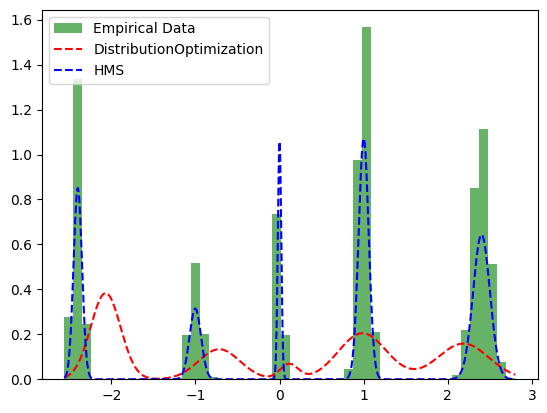

In [17]:
from distribution_optimization_py.gaussian_mixture import compare_solutions

compare_solutions(
    dataset.data,
    dataset.nr_of_modes,
    ga_solution,
    hms_solution,
    "DistributionOptimization",
    "HMS",
    num=1000,
    bins=50
)